## ADA final exam (Fall 2022)

This exam consists of 3 tasks. Tasks 2 and 3 are independent of each other (although conceptually related).


## Dataset

For a Wikipedia editor to become an administrator, a so-called “request for adminship” ([RfA](https://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship)) must be submitted by either the candidate or another community member. Subsequently, any Wikipedia member may cast a supporting or opposing vote. Here we provide a simplified version of the Wikipedia RfA dataset, containing all votes from 2003 through 2012.

###  Data format

|        |   SRC |   TGT |   VOT |   RES |   YEA | DAT                 | TXT                                                                                                                                                                                               |
|-------:|------:|------:|------:|------:|------:|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  39054 |  3444 | 10170 |     1 |     1 |  2009 | 2009-07-01 17:50:00 | '''Support''' - Best of luck. &nbsp;                                                                                                                                                              |
| 159680 |   722 |  9634 |    -1 |    -1 |  2006 | 2006-12-15 07:28:00 | '''Oppose''' Not even 2000 edits.                                                                                                                                                                 |
| 173438 |  4194 |  5524 |     1 |     1 |  2005 | 2005-03-18 19:22:00 | Ohhh, you're Carrp!  In that case, '''Support'''.                                                                                                                                                 |
|  60627 |  4855 |  9436 |     1 |     1 |  2008 | 2008-12-18 23:26:00 | '''Support''' via thoughtful answer to my question that demonstrates this editor has clue.                                                 |
| 194809 |  7687 |   908 |     1 |     1 |  2004 | 2004-09-25 05:21:00 | Nicholas is very good in English. Also, he got '''exceptional''' patience to explain petty obvious facts in talk page to convince ignorants. Let the world be benefitted more out of his work. -- |


- SRC: the user name of the source of the vote, i.e., of the user who cast the vote.
- TGT: the user name of the target of the vote, i.e., of the user running for election.
- VOT: the source's vote on the target (-1 = oppose; 1 = support).
- RES: the outcome of the election (-1 = target was rejected as admin; 1 = target was accepted). **(We will not use this  column in this exam.)**
- YEA: the year of the RfA.
- DAT: the date and time of this vote. **(We will not use this column in this exam.)**
- TXT: the comment written by the source. **(We will not use this column in this exam.)**

---


## Structural balance theory

**Structural balance theory** affirms that social networks tend to be organized so as to avoid conflictual situations, e.g., if a great friend of yours hates someone, you will likely not befriend that person.

The theory can be operationalized by looking at _triangles_ in an undirected _signed graph_ capturing person-to-person relationships, where a _signed graph_ is a  graph in which each edge is associated with a positive or negative sign, and a _triangle_ is a set of three edges ($\langle u,v \rangle$, $\langle v,w\rangle$, $\langle u,w\rangle$) that fully connect three distinct nodes ($u, v, w$).



_Triangles_ in an undirected signed graph can be in 4 _configurations_:
all positive edges ($\{+,+,+\}$); 
all negative edges ($\{-,-,-\}$); 
two positive edges and one negative edge ($\{+,+,-\}$);
one positive edge and two negative edges ($\{+,-,-\}$).

Structural balance theory posits that social networks tend to favor triangle configurations with an even number of negative signs (i.e., $\{+,+,+\}$ and $\{+,-,-\}$), which can be understood as being “balanced” by avoiding conflictual situations. Intuitively, $\{+,+,+\}$ could be tagged as “The friend of my friend is my friend”, and $\{+,-,-\}$ as “The enemy of my enemy is my friend”, “The friend of my enemy is my enemy”, or “The enemy of my friend is my enemy”. On the contrary, triangle configurations with an odd number of negative signs (i.e., $\{+,+,-\}$ and $\{-,-,-\}$) are unstable (“unbalanced”) according to structural balance theory and will thus occur less frequently in social networks. For instance, me being friends with two mutual enemies ($\{+,+,-\}$) would lead to tension that could be resolved if the two enemies became friends or if I took sides and ended my friendship with one of the two. Similarly, two among three mutual enemies ($\{-,-,-\}$) would have the incentive to form an alliance to “gang up” against the third.

Some social scientists have argued that three mutual enemies ($\{-,-,-\}$) is not necessarily a triangle configuration that social networks tend to avoid. This gives rise to **weak structural balance theory**, which only posits that social networks tend to avoid the “unbalanced” triangle configuration $\{+,+,-\}$.

In a nutshell,
- structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$ as balanced,
  - and $\{+,+,-\}$, $\{-,-,-\}$ as unbalanced;
- weak structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$, $\{-,-,-\}$ as balanced,
  - and $\{+,+,-\}$ as unbalanced.



### Task 1: Preliminaries

As a good data scientist, you first load the data and explore it.

**1.1**
Load the csv file `wiki-RfA.csv.gz` in a pandas dataframe. Calculate the number of distinct RfAs and the average number of votes per RfA.
- **Hint:** Throughout this question, assume that each RfA is uniquely determined by the column `TGT` and each vote is uniquely determined by the combination of `SRC` and `TGT`.

In [2]:
import pandas as pd

wiki_rfa_df = pd.read_csv("wiki-Rfa.csv.gz", sep=',', compression='gzip')
wiki_rfa_df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,—
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,"'''Oppose'''. This joke really isn't funny, no..."
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,'''Oppose''' as per nomination and answers. --...
3,3750,9966,-1,-1,2012,2012-12-30 22:14:00,'''Oppose''' and '''speeedy close''' this as [...
4,4225,9966,-1,-1,2012,2012-12-30 22:08:00,'''Oppose''' per nomination and answers. I am ...


In [3]:
## number of rfa's, computed assuming that each tgt is an individual RFA (i.e. each person ran in the election once)
rfa_number = wiki_rfa_df['TGT'].unique().shape[0]
print(f"The number of distinct Rfa's is {rfa_number}.")

votes_per_rfa = wiki_rfa_df.groupby('TGT')['SRC'].count().mean()
print(f"The average number of votes per rfa is {votes_per_rfa}.")

The number of distinct Rfa's is 3439.
The average number of votes per rfa is 48.561500436173304.


**1.2** 
In a single figure with three subfigures (one per item), show the following time series:
- the number of RfAs per year;
- the overall fraction of positive votes per year; and 
- the average number of votes per RfA per year.

For each of the above three quantities, print the value for the year 2008.

In [4]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean number of votes per RFA')

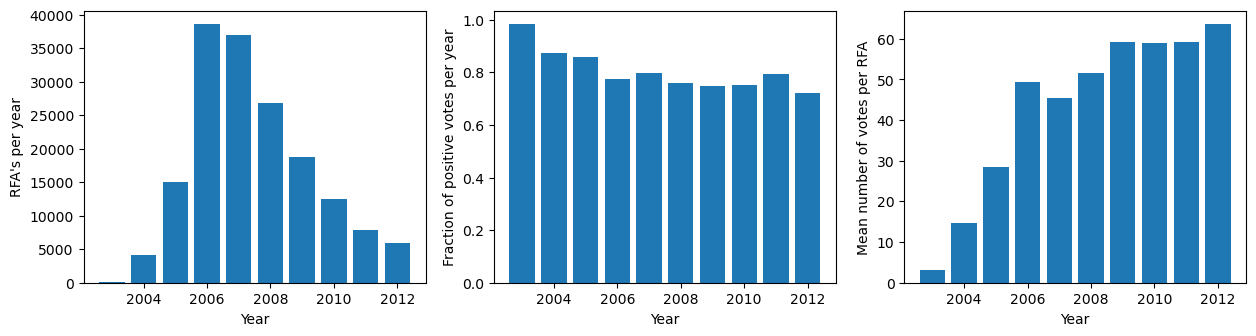

In [5]:
rfa_per_year = wiki_rfa_df.groupby('YEA')['TGT'].count().reset_index()

pos_year = wiki_rfa_df.loc[wiki_rfa_df['VOT'] == 1]
frac_pos_year = pos_year.groupby('YEA')['VOT'].count()/wiki_rfa_df.groupby('YEA')['VOT'].count()
frac_pos_year = frac_pos_year.to_frame().reset_index()


mean_vot_year = wiki_rfa_df.groupby(['YEA', 'TGT'])['VOT'].count().reset_index() ## gets individual votes and counts them per RFA
mean_vot_year = mean_vot_year.groupby(['YEA'])['VOT'].mean().reset_index() ## returns the mean

plt.figure(figsize=(15, 12))
plt.subplot(3,3,1)
plt.bar(rfa_per_year.YEA, rfa_per_year.TGT)
plt.xlabel("Year")
plt.ylabel("RFA's per year")
plt.subplot(3,3,2)
plt.bar(frac_pos_year.YEA, frac_pos_year.VOT)
plt.xlabel("Year")
plt.ylabel("Fraction of positive votes per year")
plt.subplot(3,3,3)
plt.bar(mean_vot_year.YEA, mean_vot_year.VOT)
plt.xlabel("Year")
plt.ylabel("Mean number of votes per RFA")

In [6]:
print(f"The number of RFA's in 2008 is {rfa_per_year.loc[5, 'TGT']}")
print(f"The fraction of positive votes in 2008 is {frac_pos_year.loc[5, 'VOT']}")
print(f"The mean number of votes per RFA in 2008 is {mean_vot_year.loc[5, 'VOT']}")

The number of RFA's in 2008 is 26833
The fraction of positive votes in 2008 is 0.7612268475384787
The mean number of votes per RFA in 2008 is 51.60192307692308


**1.3** 
**/Discuss:/** Describe the temporal patterns observed in the plots you did in **T1.2**.

**A1.3** 
The number of RFA4s per year decreases sharply year on year after 2006 as does the fraction of positive votes. However, the mean number of votes increases sharply as a whole from 2003 to 2012.

**1.4** 
Create an undirected graph ([`nx.Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html)) where every node corresponds to a Wikipedia user (source or target of an RfA) and where there exists an edge between two users if at least one of them has voted on the other. Each edge should have attributes corresponding to columns of the dataframe, namely:
- `VOT`, which equals `1` if the vote was positive, and `-1` otherwise.
- `YEA`, an integer that represents the year of the RfA.

**The code to load the graph has been provided to you!** After running it, print the number of nodes and edges in your graph.

---

**Observation:** Note that we have at most one edge per pair of nodes in the graph, even though two votes may be associated with the pair  — e.g., if A voted in B's RfA in time $t_1$ and B voted in A's RfA in time $t_2$ ($t_1 < t_2$). In these cases, the code provided associates the metadata of the oldest vote ($t_1$ in the example) to the edge between A and B.

In [7]:
# Provided code! Do not change!
import networkx as nx
import pandas as pd
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

In [8]:
n_nodes = nx.number_of_nodes(G)
n_edges = nx.number_of_edges(G)

print(f"The graph has {n_nodes} nodes and {n_edges} edges.")

The graph has 10831 nodes and 161147 edges.


**1.5** 
Plot the **complementary** cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

In [9]:
import seaborn as sns
import numpy as np

Text(0.5, 0, 'Degree centrality')

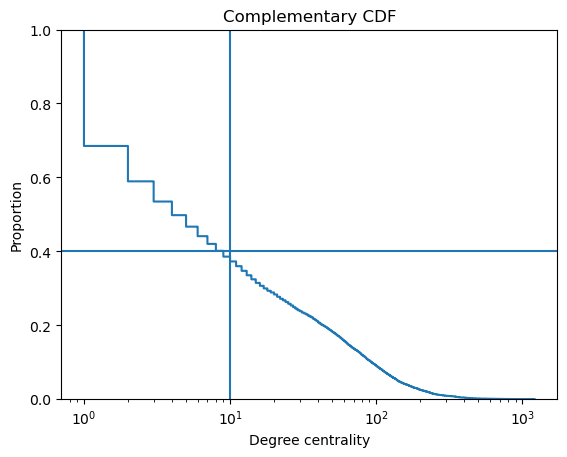

In [11]:
degree_centrality = G.degree()

sns.ecdfplot(list(dict(G.degree()).values()), complementary=True)
plt.xscale("log")
plt.axvline(10)
plt.axhline(0.4)
plt.title("Complementary CDF")
plt.xlabel("Degree centrality")


**1.6**
**/Discuss:/** Why is the following statement false? Justify your answer. **"From the graph obtained in task 1.5, one can conclude that around 40% of the users voted at least 11 times."**


**A1.6**
No because the graph above also takes into account the presence of in and out votes => they have participated in an election one way or another 11 times.

**1.7**
What fraction of users voted at least 11 times? Use the data to measure the fraction.

In [26]:
n_votes = wiki_rfa_df.groupby('SRC')['VOT'].value_counts().reset_index()
frac_11 = n_votes[n_votes['count'] >= 11].shape[0]/n_votes.shape[0]
print(frac_11)

0.2287510841283608


### Task 2: Triangles

Next, you set out to investigate the social balance theory by looking at the RfA graph.

**2.1**
Considering _only_ the RfAs of 2004 (i.e., where `YEA == 2004`), generate all triangles in the undirected graph.
Print the number of triangles found.
- **Hint:** Note that you can generate a graph with only a subset of nodes and edges via ` G.edge_subgraph`.
-  **Hint:** The function `nx.enumerate_all_cliques` generates all cliques in an undirected graph. First, all cliques of size 1 are generated, then all cliques of size 2, etc. Triangles are cliques of size 3.


In [63]:
e2004 = [(u,v) for u,v,e in G.edges(data=True) if e['YEA'] == 2004]

G2004 = G.edge_subgraph(e2004)
triangles = nx.enumerate_all_cliques(G2004)
def enumerate_all_cliques_size_k(G, k):
    i = 0
    for clique in nx.enumerate_all_cliques(G):
        if len(clique) == k:
            i += 1
        elif len(clique) > k:
            return i
    return i
n_triangles = enumerate_all_cliques_size_k(G2004, 3)
print(f"There are {n_triangles} triangles in the graph.")

There are 8448 triangles in the graph.


**2.2 ** **/True or false:/** Is the following statement true or false? Justify your answer. **"The node with the highest clustering coefficient in an undirected graph is the node that belongs to the largest number of triangles."**

**A2.2**
Clustering coefficient returns the likelihood that two nodes connected to a specific node are also connected to each other - hence forming a triangle. It thus logicaly follows that the node with the highest clustering coefficient in an undirected graph is the ndoe that belongs to the largest number of triangles.

**2.3** Considering the set of triangles previously calculated, estimate the fraction of triangles of configurations
 $\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, and $\{+,-,-\}$. What fraction of triangles are "balanced" according to structural balance theory?

In [93]:
pos_e04 = [(u,v) for u,v,e in G2004.edges(data=True) if e['VOT'] == 1] ## filtering for positive edges (= votes)

n_pos_e04 = len(pos_e04) ## number of positive edges 
n_neg_e04 = nx.number_of_edges(G2004) - n_pos_e04 ## number of negative edges

p_p_e04 = n_pos_e04/nx.number_of_edges(G2004) ## probability of positive edge
print(p_p_e04)
p_n_e04 = n_neg_e04/nx.number_of_edges(G2004) ## probability of negative edge
print(p_n_e04)

p_balanced = np.power(p_p_e04, 3) + p_p_e04*np.power(p_n_e04, 2) 
print(p_balanced)
## balanced probability give by probability of three pos and probability of 1 pos and 2neg
p_unbalanced = np.power(p_n_e04, 3) + p_n_e04*np.power(p_p_e04, 2)
print(p_unbalanced) 

frac_bal_triangles = p_balanced*n_triangles/n_triangles
print(f"{frac_bal_triangles*100}% of the triangles are balanced according to sturcural balance theory")

0.8735547355473555
0.12644526445264453
0.6805745100799184
0.09851177081979107
68.05745100799184% of the triangles are balanced according to sturcural balance theory


**2.4** To observe how triangle configurations would be distributed under a random null model, do the following:
- Create a new column `VOT_RND` in the dataframe, where RfA votes (i.e., edge signs in the graph) are shuffled, i.e., permuted randomly.  For shuffling, use `numpy.random`, without replacement and with the seed 32 (see code provided below).
- Create a new edge attribute with the values of `VOT_RND` in the graph you created in task **1.4**. You can do this easily using the  [`set_edge_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html) function.
- Considering the shuffled edge signs,  compute the fraction of triangles in each configuration ($\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, $\{+,-,-\}$). Moreover, compute the fraction of triangles that are "balanced" according to structural balance theory. (Reminder: consider only the RfAs of 2004.)


In [97]:
# PROVIDED STUB FOR 2.4
import numpy as np
np.random.seed(32)
wiki_rfa_2004_df = wiki_rfa_df[wiki_rfa_df.YEA == 2004].copy(deep=True)
wiki_rfa_2004_df["VOT_RND"] = np.random.choice(wiki_rfa_2004_df["VOT"].values, size=len(wiki_rfa_2004_df), replace=False)

In [114]:
wiki_rfa_2004_df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT,VOT_RND
156954,6578,4575,-1,-1,2004,2005-09-15 07:54:00,'''Oppose''' as above. Too few WP space edits...,1
156961,636,4575,1,-1,2004,2005-09-15 04:04:00,'''Support'''.,1
156970,6413,4575,1,-1,2004,2005-09-15 01:08:00,'''Support''' due to the quality of his contri...,1
156981,1299,4575,-1,-1,2004,2005-09-14 19:32:00,"'''Oppose''' as per [[User:Splash|Splash]], [[...",1
157001,2591,4575,1,-1,2004,2005-09-14 04:09:00,'''Support''' due to his high volume of qualit...,1


In [ ]:
edge_attr_dict = {(row['SRC'], row['TGT']): row['VOT_RND'] for _, row in wiki_rfa_2004_df.iterrows()}
nx.set_edge_attributes(G2004, edge_attr_dict, 'VOT_RND') ## à revoir par la suite

In [ ]:
r_pos_e04 = [(u,v) for u,v,e in G2004.edges(data=True) if e['VOT_RND'] == 1] ## filtering for positive edges (= votes)

r_n_pos_e04 = len(r_pos_e04) ## number of positive edges 
r_n_neg_e04 = nx.number_of_edges(G2004) - r_n_pos_e04 ## number of negative edges

r_p_p_e04 = r_n_pos_e04/nx.number_of_edges(G2004) ## probability of positive edge
print(r_p_p_e04)
r_p_n_e04 = r_n_neg_e04/nx.number_of_edges(G2004) ## probability of negative edge
print(r_p_n_e04)

r_p_balanced = np.power(r_p_p_e04, 3) + r_p_p_e04*np.power(r_p_n_e04, 2) 
print(r_p_balanced)
## balanced probability give by probability of three pos and probability of 1 pos and 2neg
r_p_unbalanced = np.power(r_p_n_e04, 3) + r_p_n_e04*np.power(r_p_p_e04, 2)
print(r_p_unbalanced) 

frac_bal_triangles = r_p_balanced*n_triangles/n_triangles
print(f"{frac_bal_triangles*100}% of the triangles are balanced according to sturcural balance theory")

0.8740467404674047
0.1259532595325953
0.6816008144083112
0.09822111370026887
68.16008144083112% of the triangles are balanced according to sturcural balance theory


**2.5** **/Discuss:/** Do the results of tasks **2.3** and **2.4** suggest that structural balance theory is correct? What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) Justify your answer.

**A2.5** 
The results are similar to the ones we computed previously. These suggest that structural balance theory is correct. A correlation or independence analysis could be performed afterwards to ensure that these results were not obtained by chance.

### Interlude: Additional data

In the data provided in the file `wiki-RfA.csv.gz` (with which you’ve worked up to now), each column corresponds to a vote from a user $u$ to a user $v$ at a time $t$. 

In **Task 2**, we did not consider the temporal aspect of this network. For the next task, you are provided with a complimentary dataset (`data/wiki-RfA_extra.csv.gz`) containing, for each vote (uniquely determined by `SRC` and `TGT`), a variety of features. **Importantly, these features were calculated considering only data that was already available at the time when the respective vote was cast.** The features are described as follows.

- `PP`, `NN`, `PN` — Each vote (signed edge) is part of zero or more triangles, and we computed the number of triangles in which the two remaining edges were both positive (`PP`), both negative (`NN`) and of different signs (i.e., one positive and one negative, `PN`). This considers only the votes the target (denoted by `TGT`) has received before the current vote. 

- `P`, `N` — The number of positive (`P`) and negative (`N`) votes that the target `TGT` received before the current vote.

- `TXT_PROCESSED` — The text in the original dataset, processed so 1) it is entirely lower-case, 2) it does not contain non-alphanumeric characters, and 3) it does not contain words starting with “supp” or “opp” (since words such as "support" and "oppose"  are obvious give-away signals of the vote).

### Interlude: Predicting edge signs with structural balance theory

We can use structural balance theory to predict edge signs. 

Consider an edge whose sign we do not know, as well as the fractions `PP`, `NN`, and `PN` associated with the edge, as defined above. 

According to structural balance theory, if `PP` + `NN` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

According to the weak structural balance theory, if `PP` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

Note that in both cases we use “$\geq$” rather than “<”, i.e., when both sides of the equation are equal, we break ties in favor of positive edges. We do so because there are more positive edges in the graph.

### Task 3: Predict it!

In the final part of the exam, you will leverage your machine learning and regression skills.

**3.1** Merge the new dataset with the original dataframe from task **1** using the columns `SRC` and `TGT`. You may drop the old `TXT` column if you want to. 


In [145]:
wiki_rfa_extra_df = pd.read_csv("wiki-Rfa_extra.csv.gz", sep=',', compression='gzip')
wiki_rfa_merged_df = pd.merge(wiki_rfa_df, wiki_rfa_extra_df, on=['SRC', 'TGT'], how='right')
wiki_rfa_merged_df.drop(['TXT', 'YEA_y'], axis=1, inplace=True)
wiki_rfa_merged_df.head()

,SRC,TGT,VOT,RES,YEA_x,DAT,PP,NN,PN,N,P,TXT_PROCESSED
0,2775,7137,1,1,2012,2012-08-20 21:29:00,0,0,0,0,0,as nom
1,2652,7137,1,1,2012,2012-08-20 21:40:00,0,0,0,0,1,i haven t seen this user around but a cursory ...
2,3356,7137,1,1,2012,2012-08-20 22:34:00,0,0,0,0,2,level headed tactful and a good communicator i...
3,4076,7137,1,1,2012,2012-08-20 22:41:00,0,0,0,0,3,user wizardman span style color 030 wizardman...
4,5612,7137,1,1,2012,2012-08-20 22:42:00,0,0,0,0,4,editor needs to spend more time on nascar and...


**3.2**  Create the following two rule-based classifiers, and for each, estimate its area under the ROC curve (a.k.a. “AUC/ROC”) on the entire dataset:

- **A)** a classifier inspired by structural balance theory. The classifier should predict a positive vote if  `PP` + `NN` $\geq$ `PN`, and a negative vote otherwise.
- **B)** a classifier inspired by weak structural balance theory. The classifier should predict a positive vote if `PP`  $\geq$ `PN` and a negative vote otherwise.

In [148]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, auc, roc_curve

wiki_rfa_merged_df['sbt'] = wiki_rfa_merged_df['PP'] + wiki_rfa_merged_df['NN']
wiki_rfa_merged_df['w_sbt'] = wiki_rfa_merged_df['PP']

## we will be performing a logistic here
## The features are the PP, PN and NN while VOT is the target

stb = LogisticRegression(solver='lbfgs')
w_stb = LogisticRegression(solver='lbfgs')

stb_features = ['PP', 'NN', 'PN']
w_stb_features = ['PP', 'PN']
target = wiki_rfa_merged_df['VOT']

y_pred_stb = cross_val_predict(stb, wiki_rfa_merged_df[stb_features], target, cv=10, method="predict_proba")
y_pred_w_stb = cross_val_predict(w_stb, wiki_rfa_merged_df[w_stb_features], target, cv=10, method="predict_proba")

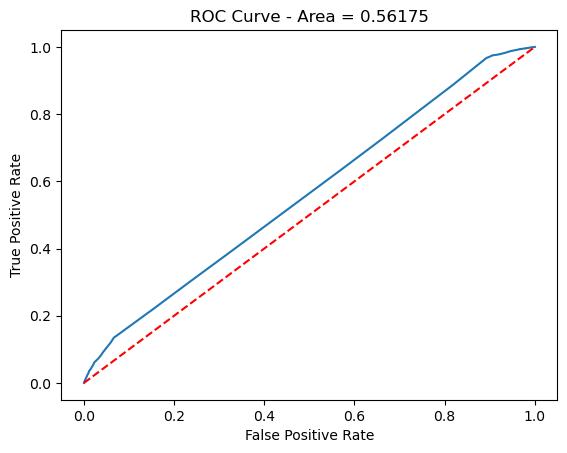

In [149]:
stb_fpr, stb_tpr, _ = roc_curve(target, y_pred_stb[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(stb_fpr, stb_tpr)
plt.plot(stb_fpr, stb_tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score));

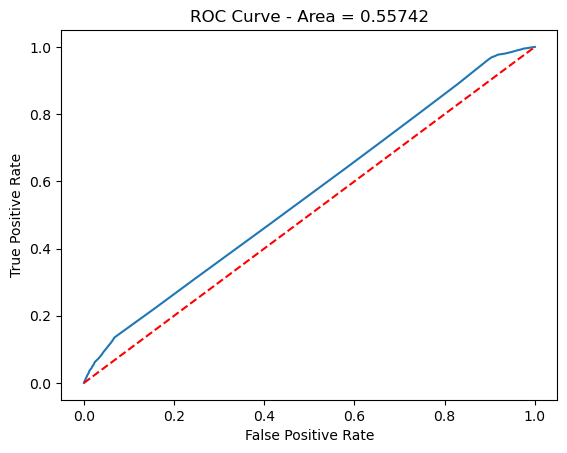

In [150]:
w_stb_fpr, w_stb_tpr, _ = roc_curve(target, y_pred_w_stb[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(w_stb_fpr, w_stb_tpr)
plt.plot(w_stb_fpr, w_stb_tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score));

**3.3** To determine if the differences in the classifiers from task **3.2** occur solely due to chance, follow the following bootstrap procedure, using 200 iterations:

- **A)** Randomly sample the entire dataset (i.e., votes from the dataframe constructed in task **3.1**) with replacement;
- **B)** Compute the difference of the AUC/ROC for the two classifiers on the entire dataset.

Then use the distribution of AUC/ROC differences (one difference per bootstrap iteration) to estimate the 95% confidence interval for the AUC/ROC difference.

In [153]:
def means_bootstrapping(df, how_many, conf, features, target, log_reg):
    bootstrapped_means=[]
    for i in range(how_many):
        sample = df.sample(random_state=32, replace=True)
        y_pred = cross_val_predict(log_reg, df[features], target, cv=10, method="predict_proba")
        fpr, tpr, _ = roc_curve(target, y_pred[:, 1])
        auc_score = auc(fpr, tpr)
        bootstrapped_means.append(auc_score)
    bootstrapped_means = pd.Series(bootstrapped_means)
    down_conf = (100-conf)/2
    up_conf = 100-down_conf
    confidence_interval = np.percentile(bootstrapped_means, [down_conf, up_conf])

    return confidence_interval

stb = means_bootstrapping(wiki_rfa_merged_df, 200, 95, stb_features, target, stb)
print(stb)
wstb = means_bootstrapping(wiki_rfa_merged_df, 200, 95, w_stb_features, target, w_stb)
print(wstb)

KeyboardInterrupt: 

**3.4 ** **/Discuss:**/ According to the results in tasks **3.2** and **3.3**, which theory better predicts actual edge signs, structural balance theory or the weak structural balance theory? 


**A3.4** *YOUR ANSWER HERE*

**3.5** How accurately can we predict the vote with more sophisticated features and algorithms?

- Create a TF-IDF representation of the text of each vote  using `sklearn`'s vectorizer ([`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) with the parameters `max_features=150` and `stop_words='english'`.
- Split the  dataset into training and test sets using sklearn [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) using parameters `test_size=0.1` and  `random_state=42`.

- Then, train two logistic regression models ([`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)) using parameters `loss='log_loss'` and `max_iter=2000` considering:

    - **1)** the TF-IDF feature vector

    - **2)** the TF-IDF feature vector and the features `PP`, `NN`, `PN`, `P`, and `N` related to the graph.

- Last, report the AUC/ROC of each model in the test set.

In [11]:
# 3.5

**3.6** **/Discuss:**/  According to the results in task **3.5**, does information from the graph help in the task of predicting the vote even when using the text?  What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) 

**A3.6** *YOUR ANSWER HERE*

**3.7** Putting on your observational studies hat, run two logistic regressions using `statsmodels`.
- In the first regression, the vote is the outcome, and `PP`, `NN` and `PN` are the predictors.
- In the second regression, the vote is the outcome, and `PP`, `NN`, `PN`, and `N` are the predictors.

In [12]:
# 3.7

**3.8** **/Discuss:**/   Explain what the coefficient associated with `PP` means in the first regression. Is it in accordance with structural balance theory?

**A3.8** *YOUR ANSWER HERE*

**3.9** **/Discuss:**/   Compare the coefficients associated with `PN` and `NN` in the first vs. the second regression. Present a reason that may explain this difference.

**A3.9**  *YOUR ANSWER HERE*

---